# Fundamentals of Data Analysis Project
## Eimear Butler, November 2018, Semester 2

### Problem statement

The box plot is common in data analysis for investigating individual numerical variables.

In this project, you will investigate and explain box plots and their uses. The boxplot function from the Python package matplotlib.pyplot can be used to create box plots.

In your notebook, you should:
- Summarise the history of the box plot and situations in which it used.
- Demonstrate the use of the box plot using data of your choosing.
- Explain any relevant terminology such as the terms quartile and percentile.
- Compare the box plot to alternatives.



NOTE: The order of the assigned tasks have been rearranged to help the flow of the answer: 

## Explain any relevant terminology such as the terms quartile and percentile

- **BOXPLOT**: dictionary.com defines it as "a graphic representation of a distribution by a rectangle, the ends of which mark the maximum and minimum values, and in which the median and first and third quartiles are marked by lines parallel to the ends." 


- **MINIMUM**: the lowest data value


- **MAXIMUM**: the highest data value


- **MEDIAN<sup>1</sup>**: the "middle" data point based on the number of data points above it and below it e.g. the median of the following data set is 3 as it is the middle value whent he list is arranged in increasing order  [1,2,3,6,6] NOTE: Should the median be between 2 numbers e.g. [1, 2, 2, 3, 6, 6], the average of 2 and 3 is therefore the median i.e. 2.5


- **1st QUARTILE<sup>1</sup> (Q1)**: is the median of the data values between the lowest data value and the median (usually not including the median itself) 


- **3rd QUARTILE<sup>1</sup> (Q3)**: is the median of the data values between the highest data value and the median (usually not including the median itself)


- **INTERQUARTILE RANGE<sup>3</sup>**: the range of values between the 1st Quartile and the 3rd Quartile. The length of the box therefore represents the interquartile range.


- **OUTLIERS<sup>3</sup>**: A value that is at the extreme end of a data set, which is affecting the overall dataset as it is either very small or large. In general, any data not included between the whiskers or on the box, is plotted as an outlier with an asterix symbol. 


- **FIVE-NUMBER SUMMARY**<sup>4</sup>: a summary term for the minimum, maximum, median, Q1 and Q3. 

The terms are best displayed visually below<sup>2</sup>

![alt text](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)



## Summarise the history of the box plot and situations in which it used

The box plot is a useful method of representing data where you wish to visualise the spread of data. Boxplots also highlight the median of the data as well as the upper and lower quartiles <sup>1</sup>. The box part of the plot aims to capture the data points between Q1 and Q3 i.e. the middle 50% of the data values. While the "whiskers" at either end aim to show the range of the lowest and highest quarters of data values. The finished product allows the user to see where the bulk of the data is and how wide a range it actually extends to. 

The "boxplot" title is credited to John Tukey in the 1970's and they are now considered a "standard statistical graph" across numerous applications<sup>5</sup>. 






## 2. Demonstrate the use of the box plot using data of your choosing

the below data set comes from UNICEF where they make a number of data sets freely available to the public. This data is a set with 17727 rows where the columns have been reduced to simplify the data and focus on certain atributes. 

relates to the immunisation coverage for countries from the late 1970's up to 2016. NOTE: not all countries have data for every year.  

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Source: https://data.unicef.org/resources/dataset/immunization/
df = pd.read_csv("https://raw.githubusercontent.com/eimearbutler7/FundamentalsDA_Project/master/immunization_coverage_survey_data-2.csv")
df.describe(exclude=[np.object])  #source: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

,cohortYear,coverage
count,26435.000000,26423.000000
mean,2003.938226,61.357643
std,8.791207,28.950799
min,1977.000000,0.000000
25%,1997.000000,37.500000
50%,2006.000000,67.900000
75%,2011.000000,87.100000
max,2016.000000,100.000000


In [150]:
df1 = df.loc[(df['vaccine'] == 'Pol3') & (df['ISO3'] == 'IND')] #soucre: https://stackoverflow.com/questions/22086116/how-do-you-filter-pandas-dataframes-by-multiple-columns
#now we have the coverage data for the Pol3 vaccine in India 
df1.describe(exclude=[np.object]) 

,cohortYear,coverage
count,30.000000,30.000000
mean,2000.600000,62.656667
std,7.636573,16.348230
min,1989.000000,25.900000
25%,1996.000000,54.300000
50%,1999.500000,66.550000
75%,2005.000000,72.950000
max,2014.000000,92.600000


{'whiskers': [<matplotlib.lines.Line2D at 0xd537a58>,
 'caps': [<matplotlib.lines.Line2D at 0xd543128>,
 'boxes': [<matplotlib.lines.Line2D at 0xd537908>],
 'medians': [<matplotlib.lines.Line2D at 0xd5437b8>],
 'fliers': [<matplotlib.lines.Line2D at 0xd543e48>],
 'means': [<matplotlib.lines.Line2D at 0xd543b00>]}

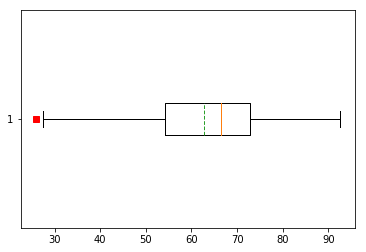

In [165]:
c_array = df1["coverage"].values #convert the dataframe column back into an array so it can be fed into a boxplot function
plt.boxplot(c_array, 0, 'rs', 0, meanline=True, showmeans=True) #plot vaccine in a boxplot coverage to see spread of data over the years 2000 - 2013 

#soucre: https://matplotlib.org/examples/pylab_examples/boxplot_demo.html

The above boxplot is an example of the implementation of the most simple form of the boxplot. We can see that the figure of 25.9 has been determined to be an outlier and has been highlighted here in green. A green dotted line in the box also shows us where the mean of the sample lies. 

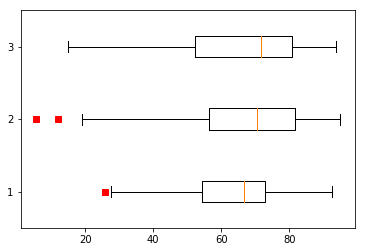

In [215]:
df2 = df.loc[(df['vaccine'] == 'Pol3') & (df['ISO3'] == 'IRQ')] #lets now pull the same data for Iraq and compare
c_array2 = df2["coverage"].values #convert the dataframe column back into an array so it can be fed into a boxplot function
df3 = df.loc[(df['vaccine'] == 'Pol3') & (df['ISO3'] == 'KEN')] #Lets also pull some for Kenya and add it to the overall plot
c_array3 = df3["coverage"].values #convert the dataframe column back into an array so it can be fed into a boxplot function


plt.boxplot([c_array, c_array2, c_array3], 0, 'rs', 0) #plot vaccine in a boxplot coverage to see spread of data over the years 2000 - 2013 

plt.show()

The above box plots now allow us to compare vaccine coverage in Kenya (1), Iraq (2) and India (3) over time, including their median point and itnerquartile range. 

{'whiskers': [<matplotlib.lines.Line2D at 0xae0e860>,
 'caps': [<matplotlib.lines.Line2D at 0xae0eef0>,
 'boxes': [<matplotlib.lines.Line2D at 0xae0e710>,
 'medians': [<matplotlib.lines.Line2D at 0xae235c0>,
 'fliers': [<matplotlib.lines.Line2D at 0xae23908>,
 'means': []}

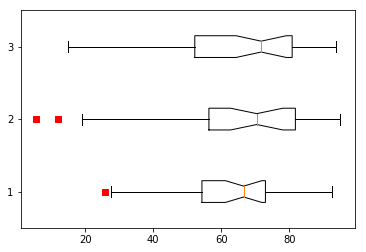

In [160]:
# the next plot we can show is a notched plot
plt.boxplot([c_array, c_array2, c_array3], 1, 'rs', 0) #source: https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

The notch is a very interesting addition to the box as it displays the confidence interval for the median. The following diagram<sup>6</sup> demonstrates this relationship: 

<img src='https://i.stack.imgur.com/urPEC.jpg' width="600" height="350">


Changing whisker Length and removal of outliers is also possible. 

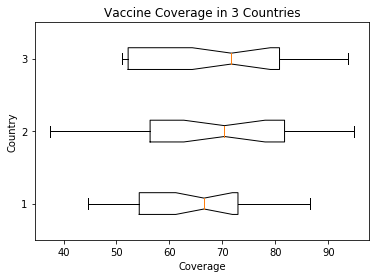

In [216]:
fig, ax1 = plt.subplots() #plot the boxplot as pubplots to allow the addition of labels below

bp = plt.boxplot([c_array, c_array2, c_array3], 1, 'rs', 0, whis=0.75, showfliers=False) 
#The critical code here being the "whis=0.75" changing the length of the whiskers to 75% and "showfliers=False" removing the outliers 

ax1.set_title('Vaccine Coverage in 3 Countries') #set titles 
ax1.set_xlabel('Coverage') #set x label
ax1.set_ylabel('Country')#set y label

plt.show()


## 4. Compare the box plot to alternatives

A challenge with the boxplot is that it does not display density of the data at any point and therefore could be misleading. 

In [ ]:
den = [2, 2, 2, 2, 2, 3, 4, 4, 5, 5, 6, 7, 7, 7, 8, 8, 8, 9, 11, 12, 12, 12, 12, 12, 12]
plt.boxplot(den) #this boxplot looks reasonably distributed but in fact, as wil will see on the next graph, a signifiacnt number of values are actually in the "whiskers".

#Source: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

In [ ]:
plt.hist(den) #plot histogram to show that a signifiacnt number of values are actually in the "whiskers".

#Source: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

beeswarm
pirate plot
violon plots

## References 

1. https://www.khanacademy.org/math/probability/data-distributions-a1/box--whisker-plots-a1/v/constructing-a-box-and-whisker-plot
2. https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/box-plot.htm
3. https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/
4. https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review
5. https://www.stata-journal.com/sjpdf.html?articlenum=gr0039
6. https://stackoverflow.com/questions/38794406/why-is-matplotlibs-notched-boxplot-folding-back-on-itself

## Back up 

{'whiskers': [<matplotlib.lines.Line2D at 0xeff42e8>,
 'caps': [<matplotlib.lines.Line2D at 0xeff4978>,
 'boxes': [<matplotlib.lines.Line2D at 0xeff4198>,
 'medians': [<matplotlib.lines.Line2D at 0xefff048>,
 'fliers': [<matplotlib.lines.Line2D at 0xefff390>,
 'means': []}

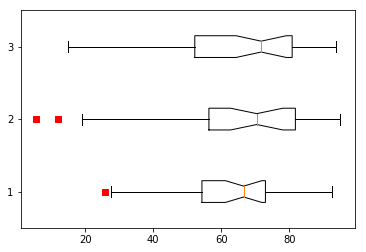

In [199]:
data = [c_array, c_array2, c_array3]
plt.boxplot(data, 1, 'rs', 0, whis=1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0xda60be0>,
 'caps': [<matplotlib.lines.Line2D at 0xda60278>,
 'boxes': [<matplotlib.lines.Line2D at 0xda60cf8>,
 'medians': [<matplotlib.lines.Line2D at 0xda94630>,
 'fliers': [],
 'means': []}

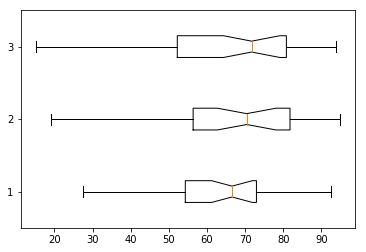

In [200]:
data = [c_array, c_array2, c_array3]
plt.boxplot(data, 1, 'rs', 0, showfliers=False) #




In [ ]:
data = [c_array, c_array2, c_array3]

fig, ax1 = plt.subplots(nrows=1, ncols=2)

axes[0, 0]plt.boxplot(data, 1, 'rs', 0, showfliers=False)
axes[0, 0]plt.set_title('No Outliers Shown', fontsize=fs)

TypeError: 'function' object does not support item assignment

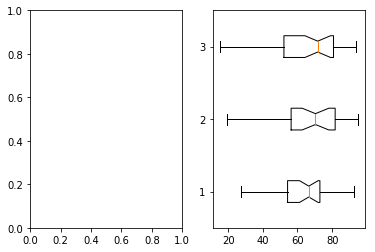

In [211]:
data = [c_array, c_array2, c_array3]

plt.subplots(nrows=1, ncols=2)

axes[0, 0] = boxplot(data, 1, 'rs', 0, showfliers=False)
axes[0, 0] = set_title('No Outliers Shown', fontsize=fs)

axes[0, 1] = boxplot(data, 1, 'rs', 0, whis=0.75)
axes[0, 1] = set_title('Shorten Whisker Length', fontsize=fs)

plt.show()


#sources: combination of https://matplotlib.org/examples/statistics/boxplot_demo.html and 
#https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

NameError: name 'ax4' is not defined

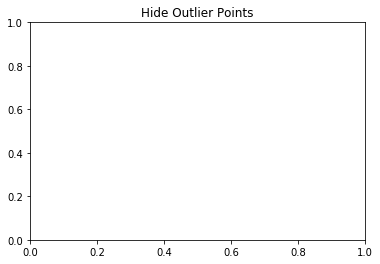

In [166]:
fig1, ax1 = plt.subplots()
ax1.set_title('Hide Outlier Points')
ax4.boxplot(data, showfliers=False)